In [177]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

%matplotlib inline

In [178]:
data = pd.read_excel("./data.xls")

В приложенном файле таблица со следующими полями:

client_id -- id клиента, зарегистрированного на сайте
birth_dt -- дата его рождения
reg_dttm -- дата и время регистрации на сайте данного клиента
purchase_id -- id покупки
purchase_dt -- дата покупки
purchase_amt -- сумма покупки


In [179]:
df = data.copy()

In [180]:
df.isna().sum()

client_id          0
birth_dt           0
reg_dttm           0
purchase_id     1138
purchase_dt     1138
purchase_amt    1138
dtype: int64

In [181]:
df = df[~df['purchase_id'].isna()]

In [182]:
df['age'] = np.round((datetime.now()-df['birth_dt']).dt.days/ 365.25, 0).astype(int)

In [183]:
df.head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,31
6,820561,1993-10-22,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,28
12,820607,1970-09-27,2019-01-05 07:54:45,1.223152e+09,2019-02-21,5000.0,52
13,820607,1970-09-27,2019-01-05 07:54:45,1.243945e+09,2019-03-09,1500.0,52
14,820628,2000-09-08,2019-01-06 12:54:53,1.231402e+09,2019-02-27,500.0,22


In [188]:
df['age_groups'] = pd.cut(df['age'], 5)
df[['age_groups', 'client_id', 'reg_dttm']].groupby(['age_groups', pd.Grouper(key='reg_dttm', freq='W')]).count()

client_id
age_groups    reg_dttm             
(20.95, 31.0] 2019-01-06          5
              2019-01-13         28
              2019-01-20         52
              2019-01-27         67
              2019-02-03         54
...                             ...
(61.0, 71.0]  2019-03-10          0
              2019-03-17          0
              2019-03-24          0
              2019-03-31          0
              2019-04-07          0

[70 rows x 1 columns]

In [189]:
df.head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age,age_groups
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,31,"(20.95, 31.0]"
6,820561,1993-10-22,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,28,"(20.95, 31.0]"
12,820607,1970-09-27,2019-01-05 07:54:45,1.223152e+09,2019-02-21,5000.0,52,"(51.0, 61.0]"
13,820607,1970-09-27,2019-01-05 07:54:45,1.243945e+09,2019-03-09,1500.0,52,"(51.0, 61.0]"
14,820628,2000-09-08,2019-01-06 12:54:53,1.231402e+09,2019-02-27,500.0,22,"(20.95, 31.0]"


In [190]:
clients_count_weeks = df[['age_groups', 'client_id', 'reg_dttm']].groupby(['age_groups', pd.Grouper(key='reg_dttm', freq='W')]).count()

In [191]:
clients_count_weeks.index.get_level_values('age_groups').unique()

CategoricalIndex([(20.95, 31.0], (31.0, 41.0], (41.0, 51.0], (51.0, 61.0],
                  (61.0, 71.0]],
                 categories=[(20.95, 31.0], (31.0, 41.0], (41.0, 51.0], (51.0, 61.0], (61.0, 71.0]], ordered=True, dtype='category', name='age_groups')

Постройте диаграмму (или график), которая показывает, как менялось множество клиентов по возрасту с течением времени.

In [ ]:
df = data.copy()
df = df[~df['purchase_id'].isna()]
df['age'] = np.round((datetime.now()-df['birth_dt']).dt.days/ 365.25, 0).astype(int)
df['age_groups'] = pd.cut(df['age'], 5)
clients_count_weeks = df[['age_groups', 'client_id', 'reg_dttm']].groupby(['age_groups', pd.Grouper(key='reg_dttm', freq='W')]).count()
fig, ax = plt.subplots(figsize=(8, 6))
for idx in clients_count_weeks.index.get_level_values('age_groups').unique():
    ax.plot(clients_count_weeks.xs(idx, level='age_groups').index, clients_count_weeks.xs(idx, level='age_groups').values, label=str(idx))
ax.legend()
ax.grid()
plt.ylim(bottom=0)
plt.xticks(rotation=20)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
for idx in clients_count_weeks.index.get_level_values('age_groups').unique():
    ax.plot(clients_count_weeks.xs(idx, level='age_groups').index, clients_count_weeks.xs(idx, level='age_groups').values, label=str(idx))
ax.legend()
ax.grid()
plt.ylim(bottom=0)
plt.xticks(rotation=20)
plt.show()

Рассматриваем следующий процесс: заявители регистрируются на сайте Тинькофф Квест, где указывают свой возраст. Всех зарегистрированных называем клиентами.



В дальнейшем кто-то из них совершает с созданного аккаунта покупки сертификатов на квест. Будем называть это утилизацией. Число дней от регистрации на сайте до первой покупки будем называть скоростью утилизации.
Если данные по покупке пустые -- клиент не совершил утилизации.

Постройте диаграмму (или график), которая показывает, как по возрастным сегментам отличается конверсия в утилизацию.

In [195]:
df = data.copy()

In [206]:
df['age'] = np.round((datetime.now()-df['birth_dt']).dt.days/ 365.25, 0).astype(int)
df['age_groups'] = pd.cut(df['age'], 5)

In [202]:
df['purchased'] = (~df['purchase_id'].isna()).astype(int)

In [208]:
df[['age_groups', 'purchased']].groupby(['age_groups']).sum()

,purchased
age_groups,
"(20.945, 32.0]",789
"(32.0, 43.0]",262
"(43.0, 54.0]",127
"(54.0, 65.0]",55
"(65.0, 76.0]",6


In [221]:
conversion = df[['age_groups', 'purchased']].groupby(['age_groups']).sum()/df['purchased'].sum()*100

In [222]:
conversion

,purchased
age_groups,
"(20.945, 32.0]",63.680387
"(32.0, 43.0]",21.146086
"(43.0, 54.0]",10.250202
"(54.0, 65.0]",4.439064
"(65.0, 76.0]",0.484262


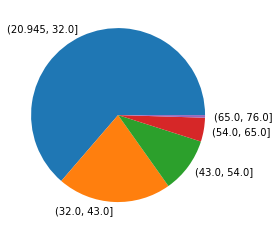

In [251]:
df = data.copy()
df['age'] = np.round((datetime.now()-df['birth_dt']).dt.days/ 365.25, 0).astype(int)
df['age_groups'] = pd.cut(df['age'], 5)
df['purchased'] = (~df['purchase_id'].isna()).astype(int)
conversion = df[['age_groups', 'purchased']].groupby(['age_groups']).sum()/df['purchased'].sum()*100
plt.pie(conversion.values[:,0], labels=conversion.index);

In [262]:
conversion2 = df[['age_groups', 'purchased']].groupby(['age_groups']).sum()/df[['age_groups', 'purchased']].groupby(['age_groups']).count()

In [275]:
conversion2

,purchased
age_groups,
"(20.945, 32.0]",0.533108
"(32.0, 43.0]",0.479853
"(43.0, 54.0]",0.526971
"(54.0, 65.0]",0.550000
"(65.0, 76.0]",0.600000


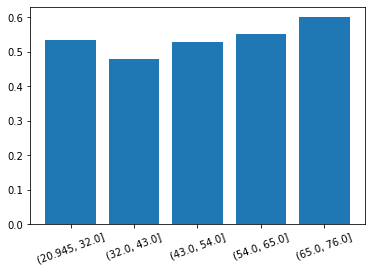

In [274]:
plt.bar(conversion2.index.astype(str), conversion2.values[:,0])
plt.xticks(rotation=20)
plt.show()

Рассматриваем следующий процесс: заявители регистрируются на сайте Тинькофф Квест, где указывают свой возраст. Всех зарегистрированных называем клиентами.

В дальнейшем кто-то из них совершает с созданного аккаунта покупки сертификатов на квест. Будем называть это утилизацией. Число дней от регистрации на сайте до первой покупки будем называть скоростью утилизации.
Если данные по покупке пустые -- клиент не совершил утилизации.
Постройте диаграмму (или график), которая показывает, как скорость утилизации влияет на размер первой покупки.

In [276]:
df = data.copy()

In [278]:
df = df[~df['purchase_id'].isna()]

In [300]:
df['purchase_speed'] = df['purchase_dt'].dt.date - df['reg_dttm'].dt.date

In [301]:
df.head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,purchase_speed
2,820523,1991-04-01,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,41 days
6,820561,1993-10-22,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,40 days
12,820607,1970-09-27,2019-01-05 07:54:45,1.223152e+09,2019-02-21,5000.0,47 days
13,820607,1970-09-27,2019-01-05 07:54:45,1.243945e+09,2019-03-09,1500.0,63 days
14,820628,2000-09-08,2019-01-06 12:54:53,1.231402e+09,2019-02-27,500.0,52 days


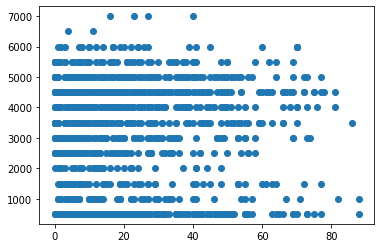

In [303]:
plt.scatter(df['purchase_speed'].dt.days, df['purchase_amt']);

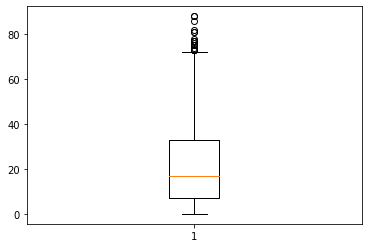

In [304]:
plt.boxplot(df['purchase_speed'].dt.days);